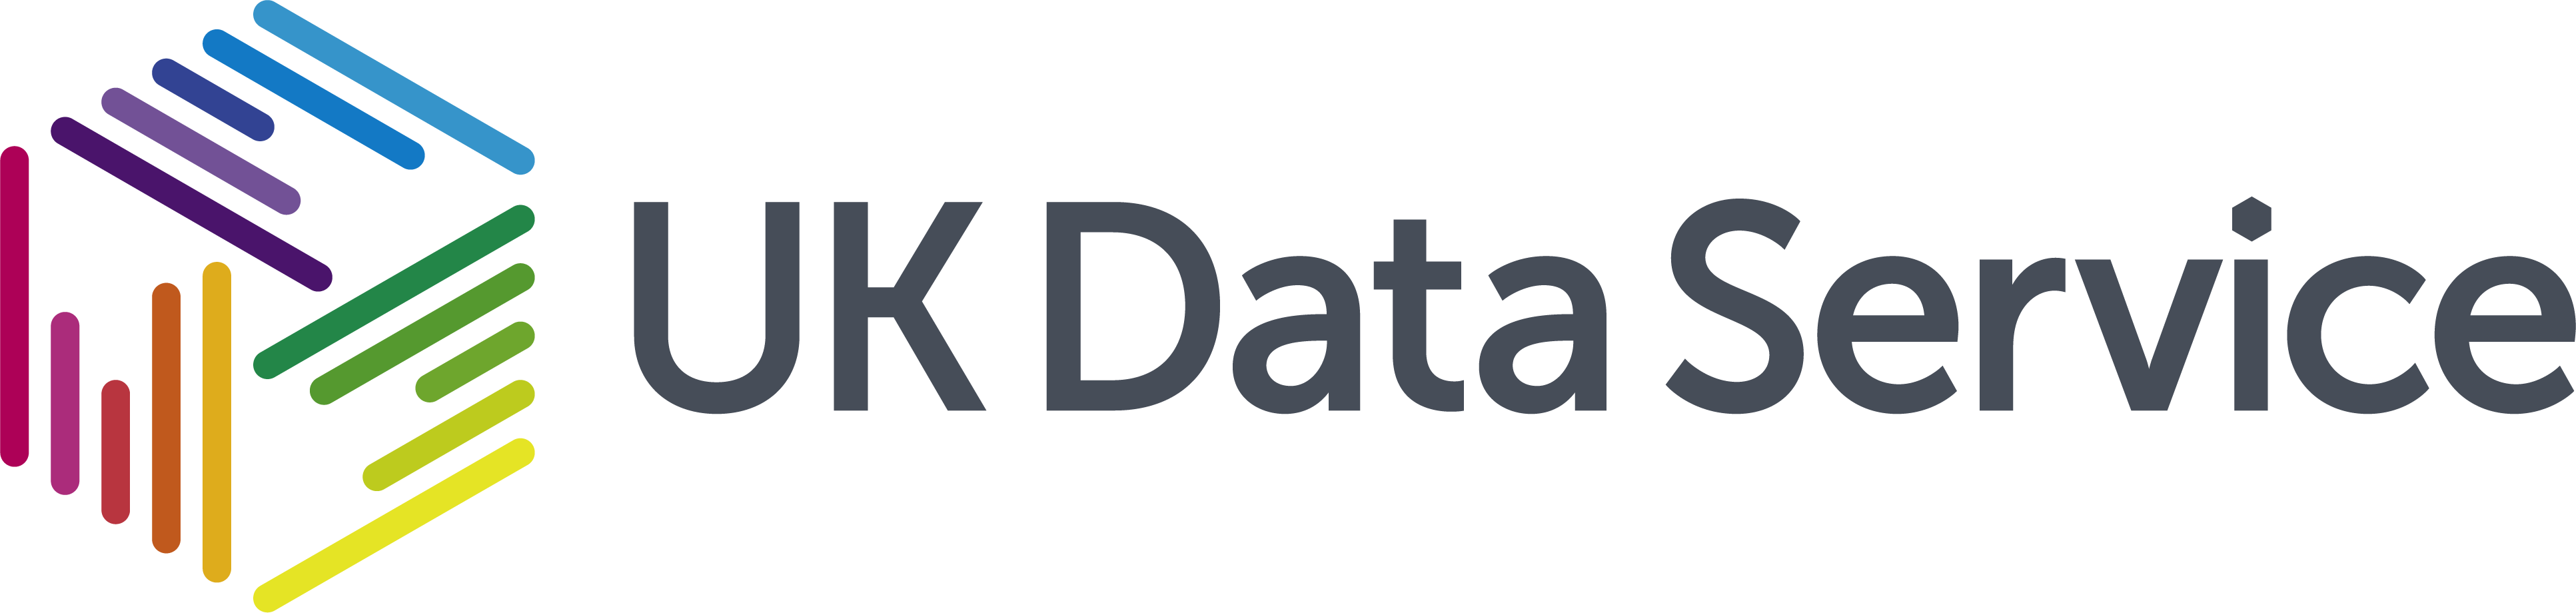

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-modules" data-toc-modified-id="Import-required-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required modules</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span></li><li><span><a href="#Removing-+-renaming-some-columns" data-toc-modified-id="Removing-+-renaming-some-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Removing + renaming some columns</a></span></li><li><span><a href="#Splitting-DataFrame" data-toc-modified-id="Splitting-DataFrame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Splitting DataFrame</a></span></li><li><span><a href="#Create-columns-for-Date,-Gender,-and-Occupation" data-toc-modified-id="Create-columns-for-Date,-Gender,-and-Occupation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create columns for Date, Gender, and Occupation</a></span><ul class="toc-item"><li><span><a href="#RegEx" data-toc-modified-id="RegEx-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>RegEx</a></span></li></ul></li><li><span><a href="#Processing" data-toc-modified-id="Processing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Processing</a></span><ul class="toc-item"><li><span><a href="#Tokenisation" data-toc-modified-id="Tokenisation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Tokenisation</a></span></li><li><span><a href="#Interesting..." data-toc-modified-id="Interesting...-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Interesting...</a></span></li><li><span><a href="#Standardising" data-toc-modified-id="Standardising-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Standardising</a></span></li><li><span><a href="#Removing-irrelevancies" data-toc-modified-id="Removing-irrelevancies-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Removing irrelevancies</a></span></li><li><span><a href="#Consolidation" data-toc-modified-id="Consolidation-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Consolidation</a></span></li></ul></li><li><span><a href="#Basic-NLP" data-toc-modified-id="Basic-NLP-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Basic NLP</a></span></li><li><span><a href="#Extraction-prep---check-the-code" data-toc-modified-id="Extraction-prep---check-the-code-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Extraction prep - check the code</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Foot and Mouth dataset

#### Health and Social Consequences of the Foot and Mouth Disease Epidemic in North Cumbria, 2001-2003

The data collection includes 42 individual semi-structured interview transcripts, 40 semi-structured diaries, 6 focus group transcripts, and 1 audiomontage transcript. Topics covered in the interviews and focus group discussions include perceptions and effects of the FMD crisis and its effects on life and livelihood in Cumbria. 

The 2001 Foot and Mouth Disease (FMD) epidemic had a profound effect on the economic, social and political life of rural Britain. Unlike the other official FMD inquiries which focused on economic and agricultural policy issues, this research was designed to produce evidence about the human health and social consequences of the epidemic. The research was based in the Cumbria area, where economic, social and political life was greatly affected by the FMD outbreak. A standing 'citizen' panel of 54 respondents was professionally recruited to inform the study which was designed around weekly free-text diaries which document the effects of the disaster and the process of recovery. 

The research design was influenced by the 'Mass Observation' approach and placed respondents at the centre of knowledge generation, as 'experts' in contributing to the understanding of 'a traumatic and devastating experience for all those who were affected by it. It was a national crisis and was probably one of the greatest social upheavals since the war' (Anderson Inquiry Report, 2002). The panel was recruited to reflect a broad range of occupations including farmers and their families, workers in related agricultural occupations, those in small businesses including tourism, hotel trades and rural business, health professionals, veterinary practitioners, voluntary organisations and residents living near disposal sites. The panel members produced 3,200 weekly diaries of enormous intensity and diversity over an 18 month period. The data were supplemented by in-depth interviews with each respondent, and focus group discussions, and in addition, 16 other interviews with stakeholders were conducted. All material was transcribed and digitised. 




## Import required modules

In [1]:
# !pip install nltk
# !pip install xlrd
# !pip install autocorrect

In [2]:
import os
# provides functions for interacting with underlying operating system
# e.g. change working directory, locate files

import nltk
from nltk import word_tokenize
 # nltk stands for natural language tool kit and is useful for text-mining
    
import re
# re is for regular expressions, which we use later 

import pandas as pd
# includes useful functions for manipulating data 

import xlrd
# we also need xlrd to read the .xls file because pandas is not old school

import autocorrect
# provides functions for spell check

## Read-in data

In [3]:
# Read-in the csv we created in the previous notebook
# We create a variable 'df' and use pd.read_csv(filepath) to convert the csv file into a DataFrame
df = pd.read_csv('Data/text.csv')

In [4]:
# Let's view the first 5 rows of the dataset
df.head(5)
# the default of head() is to print the first 5 rows

,Unnamed: 0,0,1
0,0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: ...
1,1,5407diary03.rtf,Information about diarist\nDate of birth: 1966...
2,2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: ...
3,3,5407diary08.rtf,Information about diarist\nDate of birth: 1963...
4,4,5407diary09.rtf,Information about diarist\nDate of birth: 1981...


## Pre-processing

Data Preprocessing is a technique which is used to convert the raw data set into a clean data set. In other words, whenever the data is collected from different sources it is collected in raw format which is not feasible for the analysis.

Hence, certain steps are followed and executed in order to convert the data into a small and clean data set.

## Removing + renaming some columns

In [5]:
# We don't need the first column 'Unnamed: 0', as our rows already have a numbered index
df = df.drop(columns = ['Unnamed: 0'])


In [6]:
df.head()

,0,1
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: ...
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966...
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: ...
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963...
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981...


In [7]:
# Let's rename our remaining columns with something more intelligible 

df.columns = ["Filename", "Text"]

In [8]:
# Let's take a quick look at our dataset to see if the above has worked...

df.head()

,Filename,Text
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: ...
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966...
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: ...
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963...
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981...


## Splitting DataFrame

We can clean up our dataset even further by making some smart decisions about how to break it up. By printing the first 50 rows below, we can identify 3 different types of files. We have:

* diary files - row 0-39
* focus groups - row 40-45
* interview files - row 46-86

Let's go ahead and split this big DataFrame into 2 smaller ones, to make it easier to analyse diary files and group + interview files separately.

In [9]:
df.head(50)

,Filename,Text
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: ...
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966...
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: ...
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963...
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981...
5,5407diary10.rtf,Information about diarist\nDate of birth: 1937...
6,5407diary13.rtf,Information about diarist\nDate of birth: 1947...
7,5407diary14.rtf,\nInformation about diarist\nDate of birth: 19...
8,5407diary15.rtf,Information about diarist\nDate of birth: 1949...
9,5407diary16.rtf,\nInformation about diarist\nDate of birth: 19...


In [10]:
# Here we create a variable 'diary_files' which will contain rows 0-39 of our original DataFrame
diary_files = df.loc[:39]

# .loc - is used to access rows or columns in a DataFrame
# BEFORE the comma - indicates start position of rows we want to access
# AFTER the comma - indicates the end position
# NOTE: if there is no number BEFORE the comma this means access everything up to and including the end value!

In [11]:
diary_files

,Filename,Text
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: ...
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966...
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: ...
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963...
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981...
5,5407diary10.rtf,Information about diarist\nDate of birth: 1937...
6,5407diary13.rtf,Information about diarist\nDate of birth: 1947...
7,5407diary14.rtf,\nInformation about diarist\nDate of birth: 19...
8,5407diary15.rtf,Information about diarist\nDate of birth: 1949...
9,5407diary16.rtf,\nInformation about diarist\nDate of birth: 19...


In [12]:
# Let's go ahead and do the same for our rows containing group + interview files

interview_files = df.loc[40:]

# NOTE: if there is no number AFTER the comma this means access everything after (and including) the start position

In [13]:
interview_files

,Filename,Text
40,5407fg01.rtf,\nGroups Discussion with Members of Farmers F...
41,5407fg02.rtf,Groups Discussion with Members of Small Busine...
42,5407fg03.rtf,\n\nGroups Discussion with Members of Agricul...
43,5407fg04.rtf,\nNO AUDIO RECORDING\n\nGroups Discussion with...
44,5407fg05.rtf,\n\nGroups Discussion with Community Group of ...
45,5407fg06.rtf,"\n\nGroup Discussion Panel Members, Group 6 – ..."
46,5407int02.rtf,\nDate of Interview: 14/03/02\n\nInformation a...
47,5407int03.rtf,\nDate of Interview: 08/03/02\n\nInformation a...
48,5407int07.rtf,\nDate of Interview: 14/03/02\n\nInformation a...
49,5407int08.rtf,\nDate of Interview: 06/03/02\n\nInformation a...


In [14]:
pd.set_option('max_colwidth', 500)

diary_files.iloc[0]['Text'][:200]

'\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic region: North Cumbria\n\n\nDiary 1         \nThursday Meeting @ N Lakes\nFriday TB testing on restocking farm. Usual'

## Create columns for Date, Gender, and Occupation

Perhaps for our research project it's important for us to extract text information relating to the date of the diary entry or interview, and the gender and occupation of the participants. In terms of health data this can be particularly important. If you're looking to scrape some information to build a dataset on a particular disease (e.g. long covid) and the symptoms that people are experiencing, you're going to want some socio-demographic variables.  

So.. how do we do this?

### RegEx

We can extract the text we want and place it into a column, by using something called RegEx. This stands for 'regular expression', and it denotes a sequence of characters that specifies a search pattern in text. 

When first approaching regular expressions, it will seem as if it's a completely different language. But, with enough practice, and with a strong grasp of the basics under your belt, you'll be able to incorporate this method into your text-mining endeavours. 

I'm not going to go through everything here, but I will include some resources below which will aid in your understanding of this topic. 

* https://www.computerhope.com/jargon/r/regex.htm - the lowdown on RegEx
* https://regex101.com/ - useful if you want to test your RegEx patterns

TLDR: RegEx are a set of characters which are used to create patterns. We can use these patterns to search, find, replace, or validate text.

#### DOB

In [15]:
# First I create a new column called 'DOB'
diary_files['DOB'] = diary_files['Text'].str.extract(r'(\b\d{4}\b)')


# Then I access each row in my 'Text' column and use str.extract()
# str.extract() is a pandas function that we can use to extract groups in the RegEx pattern

# Understanding the RegEx pattern:
# r' - denotes the start of a regular expression
# () - brackets denotes a capturing group
# d{4} - denotes 4 digits - as we are looking for a year of birth
# \b - denotes the boundary of a word - to make sure we only match the first occurence of 4 consecutive digits

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_4417/2832187842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diary_files['DOB'] = diary_files['Text'].str.extract(r'(\b\d{4}\b)')


In [16]:
pd.set_option('max_colwidth', 100)
diary_files.head()

,Filename,Text,DOB
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981


#### GENDER

In [17]:
diary_files['Gender'] = diary_files['Text'].str.extract('r\:\s*([MF])')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_4417/1414638335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diary_files['Gender'] = diary_files['Text'].str.extract('r\:\s*([MF])')


In [18]:
diary_files.head(5)

,Filename,Text,DOB,Gender
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975,M
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966,F
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964,F
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963,M
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981,F


#### OCCUPATION

In [19]:
diary_files['Occupation'] = diary_files['Text'].str.extract(r'\:\s*(Group\s*[1-6])')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_4417/1692791862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diary_files['Occupation'] = diary_files['Text'].str.extract(r'\:\s*(Group\s*[1-6])')


In [20]:
diary_files.head()

,Filename,Text,DOB,Gender,Occupation
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975,M,Group 6
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966,F,Group 6
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964,F,Group 6
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963,M,Group 6
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981,F,Group 5


In [21]:
di = {'Group 1': 'Farmers',
     'Group 2': 'Rural Business',
     'Group 3': 'Agricultural related occupations',
     'Group 4': 'Frontline Workers',
     'Group 5': 'Community',
     'Group 6': 'Animal/Human Health Professionals'}

diary_files['Occupation'] = diary_files['Occupation'].map(di)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_4417/1565106535.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diary_files['Occupation'] = diary_files['Occupation'].map(di)


In [22]:
diary_files.head()

,Filename,Text,DOB,Gender,Occupation
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975,M,Animal/Human Health Professionals
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966,F,Animal/Human Health Professionals
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964,F,Animal/Human Health Professionals
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963,M,Animal/Human Health Professionals
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981,F,Community


## Processing 

This includes the following steps:

* Tokenisation: splitting raw data into various kinds of "short things" that can be statistically analysed
* Standardising: includes converting case, correcting spelling, find-and-replace operations to remove abbreviations, RegEx etc)
* Removing irrelevancies: includes anything from punctuation to stopwords like 'the' or 'to' that are unhelpful for many kinds of analysis
* Consolidation: includes stemming and/or lemmatisation that strip words back to their 'root'
* Basic NLP: includes tagging, named entity recognition, and chunking.

NOTE: In practice, most text-mining work will require that any given corpus undergo multiple steps, but the exact steps and the exact order of steps depends on the desired analysis to be done.

Also, it is good practice to create new variables whenever you manipulate an existing variable rather than write over the original. This means that you keep the original and can go back to it anytime you need to if you want to try a different manipulation or correct an error. You will see how this works as we progress through the processing steps. 



### Tokenisation

Our first step is to cut our 'one big thing' into tokens, or 'lots of little things'. As an example, one project I worked involved downloading a file with hundreds of recorded chess games, which I then divided into individual text files with one game each. The games had a very standard format, with every game ending with either '1-0', '0-1' or '1/2-1/2'. Thus, I was able to use regular expressions (covered in more detail later) to iterate over the file, selecting everyithing until it found an instance of '1-0', '0-1' or '1/2-1/2', at which point it would cut what it had selected, write it to a blank file, save it, and start iterating over the original file again. 

Other options that might make more sense with other kinds of files would be to to cut and write from the large file to new files after a specified number of lines or characters. 

Whether you have one big file or many smaller ones, most text-mining work will also want to divide the corpus into what are known as 'tokens'. These 'tokens' are the unit of analysis, which might be chapters, sections, paragraphs, sentences, words, or something else. 

Since we have our file already with one on each row, we can skip the right to tokenising that text into sentences and words. Both options are functions available through the ntlk package that we imported earlier. These are both useful tokens in their own way, so we will see how to produce both kinds. 
 
We start by dividing the text in each file into words, splitting the string into substrings whenever 'word_tokenize' detects a word. 

Let's try that. But this time, let's just have a look at the first 100 things it finds instead of the entire text.

In [23]:
df.head()

,Filename,Text
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...


In [24]:
# Now I'm going to return to just using the previous DataFrame labelled 'df'
# This includes both diary files + group and interview files

# First I'll create a new column called 'tokenised_words'

df['tokenised_words'] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis = 1)

# apply - used to apply a function along an axis of the DataFrame: i.e, axis 1
# lambda - anonymous function (no name) that can take any number of arguments
# lambda ensures that the function tokenize is applied to every ROW in the text column


In [25]:
# Let's have a closer look at the results, by focusing on one row of our Text column
# Let's print the first 100 items in row 1
df['tokenised_words'][1][:100]

['Information',
 'about',
 'diarist',
 'Date',
 'of',
 'birth',
 ':',
 '1966',
 'Gender',
 ':',
 'F',
 'Occupation',
 ':',
 'Group',
 '6',
 'Geographic',
 'region',
 ':',
 'North',
 'Cumbria',
 'Diary',
 '1',
 'Monday',
 'was',
 'the',
 'usual',
 'long',
 'hard',
 'grind',
 '.',
 'I',
 'accept',
 'that',
 'I',
 'have',
 'to',
 'put',
 'in',
 '10',
 '–',
 '12',
 'hours',
 'and',
 'I',
 'don',
 '’',
 't',
 'mind',
 'doing',
 'the',
 'work',
 'because',
 'it',
 '’',
 's',
 'not',
 'physically',
 'or',
 'mentally',
 'taxing',
 'but',
 'I',
 'do',
 'hate',
 'not',
 'having',
 'a',
 'lunch',
 'break',
 ',',
 'just',
 'that',
 'little',
 'bit',
 'of',
 'selfish',
 'time',
 'to',
 'site',
 ',',
 'have',
 'a',
 'cigarette',
 ',',
 'take',
 'the',
 'dogs',
 'down',
 'the',
 'river',
 ',',
 'see',
 'the',
 'horses…whatever',
 '.',
 'I',
 'do',
 'resent',
 'that',
 'fact']

### Interesting...

We can notice a few things.

We can see that the output is a list of strings. We know it is a list because it starts and ends with square brackets and we know the things in that list are strings because they are surrounded by single quotes. 

We can also see that puctuation marks are counted as tokens in that list. For example, the full stop at the end of the first sentence appears as its own token because word_tokenize knows that it does not count as part of the previous word. Interestingly, 'horses...whatever' is all one token, despite having full stops in.

Nice. Now we have identified a few further things that we might want to change. 

### Standardising 

This is a pretty important step if you want to look at the frequency of certain terms. In this case, we don't want a term such as 'Horses' to count as a different word to 'horses'. 

We can remove all uppercase letters with a built-in Python command, and we can use the same combination of the apply() and lambda() functions to create a new column of lowercase tokenized words!

#### Lowercasing our tokens

In [26]:
# First, create new column with name
df['lowercase_tokens'] = df['tokenised_words'].apply(lambda x: [t.lower() for t in x])

# Then access the row we want - 'tokenised_words'
# Use apply to apply the lambda function...
# In this case, x is each row in our tokenised_words column
# t is each token in the list - we perform t.lower()
# We use for to iterate over each token in our list

In [27]:
# Let's see if it worked...
# Looking at the first 10 elements in row 1
df['lowercase_tokens'][1][:10]

# Nice. We can see 'information', 'date', and 'gender' are all now lowercased!

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 ':',
 '1966',
 'gender',
 ':']

#### Spelling correction

Another bit of standardising that we may want to do, is to ensure that we have no spelling errors. Fortunately, there are several decent spellchecking packages written for Python. 

They are not automatically installed and ready to import in the same way that the 'os' package was, but we just need to install the packages and import the functions we need through an installer called 'pip'. 

But I expect many of you are following this code through the Binder file that I put on GitHub, so you won't need to install anything using pip. If however, you want to set up your own coding environment and do some text-mining, you'll have to get familiar with pip! 

If you visit the top of the notebook, you can see I've put the packages you will need to pip install in a comment. 

In [28]:
# First lets access the Speller function from the package autocorrect
# We'll assign it to a variable called 'spell'
spell = autocorrect.Speller(lang = 'en')

Creating that one-word command saves us some time, which is maybe less important here but is a good skill to be aware of if you are working on text-mining every day for weeks on end. Always be on the look out for good ways to save time. 

Speaking of time.. to spellcheck each token contained within each row takes about 12 minutes, so for the sake of time I'm just going to perform spell check on the first row of the 'lowercase_tokens' column. But I'll include the code (but commented out) for performing spellcheck on each row of the 'lowercase_tokens', and creating a 'spell_checked' column.

In [29]:
# First, create new column with name

# df['spell_checked'] = df['lowercase_tokens'].apply(lambda x: [spell(w) for w in x])

# Then use combo of apply and lambda function to apply spell check to each token 
# Do this for each row in the 'lowercase_tokens' function

In [30]:
# Here, I'm using something called list comprehension
# I'm only performing spell check on the first 50 elements of row 0

[spell(x) for x in df['lowercase_tokens'][0][:50]]


['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 ':',
 '1975',
 'gender',
 ':',
 'm',
 'occupation',
 ':',
 'group',
 '6',
 'geographic',
 'region',
 ':',
 'north',
 'cambria',
 'diary',
 '1',
 'thursday',
 'meeting',
 '@',
 'n',
 'lakes',
 'friday',
 'tb',
 'testing',
 'on',
 'restoring',
 'farm',
 '.',
 'usual',
 'chat',
 'and',
 'der',
 'comments',
 'the',
 'meeting',
 '(',
 'research',
 'panel',
 'gp',
 '6',
 ')',
 'at',
 'the',
 'north']

In [31]:
# To see if it's worked let's compare the spellchecked list above, to the original list

df['lowercase_tokens'][0][:50]

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 ':',
 '1975',
 'gender',
 ':',
 'm',
 'occupation',
 ':',
 'group',
 '6',
 'geographic',
 'region',
 ':',
 'north',
 'cumbria',
 'diary',
 '1',
 'thursday',
 'meeting',
 '@',
 'n',
 'lakes',
 'friday',
 'tb',
 'testing',
 'on',
 'restocking',
 'farm',
 '.',
 'usual',
 'chat',
 'and',
 'defra',
 'comments',
 'the',
 'meeting',
 '(',
 'research',
 'panel',
 'gp',
 '6',
 ')',
 'at',
 'the',
 'north']

How did it do? Well, this spell-checker replaced 'defra' with 'der'. It can sometimes have a problem with names of organisations that are not within its dictionary. But it can also fall short with other words. This is why it's important to know your research topic well and think through if there's any other abbreviations to look out for/ensure they don't get changed by spell check. 

But for now, let's use RegEx to find and replace 'der' with 'defra'.


#### DEFRA 

Given that we know the correction of 'defra' was erroneous in our row 0, let's go ahead and correct it.

In [32]:
# First let's save our spellchecked list as a variable named 'l'
l = [spell(x) for x in df['lowercase_tokens'][0][:50]]


# Now, let's use list comprehension again with re.sub
# re.sub - a RegEx function - sub stands for substring and returns a string with replaced values
# We want to replace "der" with "defra" 
# x - is our lowercased tokens inside our 'l' list variable
# We want to iterate through our list and replace any "der" strings with "defra"

[re.sub("der", "defra", x) for x in l]

# Nice. We can see below that 'der' has changed to 'defra'

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 ':',
 '1975',
 'gendefra',
 ':',
 'm',
 'occupation',
 ':',
 'group',
 '6',
 'geographic',
 'region',
 ':',
 'north',
 'cambria',
 'diary',
 '1',
 'thursday',
 'meeting',
 '@',
 'n',
 'lakes',
 'friday',
 'tb',
 'testing',
 'on',
 'restoring',
 'farm',
 '.',
 'usual',
 'chat',
 'and',
 'defra',
 'comments',
 'the',
 'meeting',
 '(',
 'research',
 'panel',
 'gp',
 '6',
 ')',
 'at',
 'the',
 'north']

#### What if we want to make sure that we corrected 'der' to 'defra'  in each row of our 'spell_checked' column?

Again, because we haven't created this spell_checked column (due to time constraints), I will include the code below, and you can execute it in your own time.

In [33]:
# In this case, we could create a function and then apply it to the 'spell_checked' column

# First we create a function, using the 'def' keyword
# Then we create a parameter called 'x' - this is what we supply an argument to, when we call the function
def replacement_mapping(x):
#     if statement - means if string item is equal to 'der' do this...
        if x == "der":
#         substitute the "der" string for "defra"
            return re.sub("der","defra",x)
        else:
#         Otherwise return x, i.e., don't change the string
            return x  


# Let's go ahead and apply this function to the 'spell_checked' column

# df["spell_checked"] = df["spell_checked"].apply(lambda x:[replacement_mapping(w) for w in x])


#### Extra spellcheck issue!

So the spellcheck also may have changed a bunch of other important abbreviations.

Let's consider: 

* fmd - foot and mouth disease
* fmc - foot and mouth crisis
* fm - foot mouth
* tb - tuberculosis
* soa - sole occupancy authenticity
* defra - department for environment, food & rural affairs

I've come across these accronyms within certain rows, so I'm going to access these specific rows using .loc. What I've done is used an 'if statement', to check that each string e.g. 'fmd' is in the 'spell_checked' column. If it is, then the code prints 'True', and if not, I receive a 'False'. This will help me determine what I need to correct within my column.

Of course, as I've said I haven't ran spell check on the 'lowercase_tokens' column due to time constraints. But, if you want to go ahead and run it in your own time, please feel free to uncomment the code in the cell below and check if you need to fix any other abbreviations.

In [34]:
# Does it have Foot Mouth Disease" abbreviation?

# if 'fmd' in foot_mouth_df.loc[1,'spell_checked']:
#     print(True)
# else:
#     print(False)
    
# #Does it have Foot Mouth Crisis" abbreviation?

# if 'fmc' in foot_mouth_df.loc[83,'spell_checked']:
#     print(True)
# else:
#     print(False)

# #Does it have "Foot Mouth" abbreviation?
# if 'fm' in foot_mouth_df.loc[2,'spell_checked']:
#     print(True)
# else:
#     print(False)
    
# #Does it have "TB" abbreviation?
# if 'tb' in foot_mouth_df.loc[1,'spell_checked']:
#     print(True)
# else:
#     print(False)

# #Does it have Sole Occupancy Authentitys" abbreviation?
# if 'soa' in foot_mouth_df.loc[2,'spell_checked']:
#     print(True)
# else:
#     print(False)
    
# #So I noticed the text also spelt "DEFRA" wrong at one point so need to sort that out too!
# if 'derfa' in foot_mouth_df.loc[1,'spell_checked']:
#     print(True)
# else:
#     print(False)

#### How would we go about correcting multiple spellchecked words?

If we had run the code above on the whole of the 'spell_checked' column, we would see that both 'fmd' and 'defra' would have returned true. Indeed, expected that you might have more abbreviations which you want to maintain, and you don't want to spend a massive amount of time creating individual replacement_mapping() functions to deal with them. Luckily, there's an easy way around this!

One way to do that might be to define multiple terms to replace and what to replace them with. 

In [35]:
def multiple_replace(dict, text):
  # Create a regular expression  from the dictionary keys
  regex_pattern = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
  print(regex_pattern)  
    
  # For each match, look-up corresponding value in dictionary
# mo stands for match object
# mo.start() + mo.end() - return the start and end indexes of the match so..
# mo.string[mo.start():mo.end()] will return you the matched string
  return regex_pattern.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text) 

if __name__ == "__main__": 

  text = "der have released a statement about the ffd crisis"  
    
  dict = {
    "der" : "defra",
    "ffd" : "fmd",
  } 

  print(multiple_replace(dict, text))

re.compile('(der|ffd)')
defra have released a statement about the fmd crisis


### Removing irrelevancies

#### Remove punctuation

Punctuation is not always very useful for understanding text, especially if you look at words as tokens because lots of the punctuation ends up being tokenised on its own. 

We could use RegEx to replace all punctuation with nothing, and that is a valid approach. But, just for variety sake, I demonstrate another way here.

Forging ahead, let's filter out punctuation. We can define a string that includes all the standard English language punctuation, and then use that to iterate over the relevant DataFrame column, removing anything that matches.

But wait... Do we really want to remove the:

- hyphens in things like 'ninety-six' or words like 'lactose-free'? 
- full stops in things like 'u.k.'? 
- the apostrophe in contractions or possessives?

There are no right or wrong answers here. Every project will have to decide, based on the research questions, what is the right choice for the specific context. In this case, we want to remove the full stops, even from 'u.k.' so that it becomes identical to 'uk'. 

But, at the same time, we don't necessarily want to remove apostrophes. That is a punctuation mark that occurs in the middle of words and do add meaning to the word, so I want to keep them. 


In [36]:
# First, define a variable with all the punctuation to remove.
English_punctuation = "!\"#$%&()*+,./:;<=>?@[\]^_`{|}~“”-" 
 # Print that defined variable, just to check it is correct.
print(English_punctuation)                                    



!"#$%&()*+,./:;<=>?@[\]^_`{|}~“”-


In [37]:
# Create a function with a parameter 'from_text'
# This function will iterate over the strings in a row
# The python function 'maketrans' creates a table that maps the punctuation marks to 'None'
# We will print the table to check it's worked

def remove_punctuation(from_text):
    table = str.maketrans('', '', English_punctuation) 
    stripped = [w.translate(table) for w in from_text]
    return stripped

df['no_punct'] = [remove_punctuation(i) for i in df['lowercase_tokens']] 


In [38]:
# Let's see if it actually removed the punctuation...

df['no_punct'][1][:50]

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 '',
 '1966',
 'gender',
 '',
 'f',
 'occupation',
 '',
 'group',
 '6',
 'geographic',
 'region',
 '',
 'north',
 'cumbria',
 'diary',
 '1',
 'monday',
 'was',
 'the',
 'usual',
 'long',
 'hard',
 'grind',
 '',
 'i',
 'accept',
 'that',
 'i',
 'have',
 'to',
 'put',
 'in',
 '10',
 '–',
 '12',
 'hours',
 'and',
 'i',
 'don',
 '’',
 't',
 'mind',
 'doing',
 'the']

In [39]:
# Let's compare it to row 1 of the column without punctuation removed...
df['lowercase_tokens'][1][:50]

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 ':',
 '1966',
 'gender',
 ':',
 'f',
 'occupation',
 ':',
 'group',
 '6',
 'geographic',
 'region',
 ':',
 'north',
 'cumbria',
 'diary',
 '1',
 'monday',
 'was',
 'the',
 'usual',
 'long',
 'hard',
 'grind',
 '.',
 'i',
 'accept',
 'that',
 'i',
 'have',
 'to',
 'put',
 'in',
 '10',
 '–',
 '12',
 'hours',
 'and',
 'i',
 'don',
 '’',
 't',
 'mind',
 'doing',
 'the']

#### But... what about the empty strings?

Did you notice that removing the punctuation has left list items that are empty strings. Between 'corpus' and 'it', for example, is an item shown as ''. This is an empty string item that was a full stop before we removed the punctuation. 

Since those empty strings are python-recognised instances of 'None',  python can find and filter them out. 

In [40]:
# Let's create a new column with a new name 'no_punct_no_space'
# We use list comprehension to filter each instance of 'None' and remove it from each row

df['no_punct_no_space'] = [list(filter(None, sublist)) for sublist in df['no_punct']]

In [41]:
# Let's see if it's worked..

df['no_punct_no_space'][1][:50]
# Nice. We have no empty string items!

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 '1966',
 'gender',
 'f',
 'occupation',
 'group',
 '6',
 'geographic',
 'region',
 'north',
 'cumbria',
 'diary',
 '1',
 'monday',
 'was',
 'the',
 'usual',
 'long',
 'hard',
 'grind',
 'i',
 'accept',
 'that',
 'i',
 'have',
 'to',
 'put',
 'in',
 '10',
 '–',
 '12',
 'hours',
 'and',
 'i',
 'don',
 '’',
 't',
 'mind',
 'doing',
 'the',
 'work',
 'because',
 'it',
 '’',
 's']

#### Remove stopwords

Stopwords are typically conjunctions ('and', 'or'), prepositions ('to', 'around'), determiners ('the', 'an'), possessives ('s) and the like. The are **REALLY** common in all languages, and tend to occur at about the same ratio in all kinds of writing, regardless of who did the writing or what it is about. These words are definitely important for structure as they make all the difference between "Freeze *or* I'll shoot!" and "Freeze *and* I'll shoot!". 

Buuuut... for many text-mining analyses, these words don't have a whole lot of meaning in and of themselves. Thus, we want to remove them. 

Let's start by downloading the basic stopwords function built into nltk and storing the English language ones in a list called, appropriately enough, 'stop_words'. 

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loucap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords

# create a stop_words variable that contains all of the english stopwords in a list
stop_words = set(stopwords.words('english'))

# the sorted() function makes sure the list is arranged in alphabetical order
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

Ah! It contains quite a few words that will change the meaning of a sentence. So I will make sure to customise the stopwords list so they DON'T include these important words. 

In [44]:
new_stopwords =[e for e in stop_words if e not in ("aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't",'no','not',"only","shouldn't","wasn't","weren't","won't","wouldn't")]
print(len(new_stopwords))

159


Great. Now let's remove those new_stopwords by creating another column called `no_stop_words`. Then, we iterate over the `no_punct_no_space` column, looking at them one by one and appending them to `no_stop_words` if and only if they do not match any of the items in the stop_words list. 

In [45]:
# Create new column called 'no_stop_words'
df['no_stop_words'] = df['no_punct_no_space'].apply(lambda x: [item for item in x if item not in new_stopwords])

# Use apply and lambda combo
# Basically, keep item in x as item it is, if it's not a stopword


In [46]:
# You know the drill, let's see if it worked...

df['no_stop_words'][1][:50]

['information',
 'diarist',
 'date',
 'birth',
 '1966',
 'gender',
 'f',
 'occupation',
 'group',
 '6',
 'geographic',
 'region',
 'north',
 'cumbria',
 'diary',
 '1',
 'monday',
 'usual',
 'long',
 'hard',
 'grind',
 'accept',
 'put',
 '10',
 '–',
 '12',
 'hours',
 '’',
 'mind',
 'work',
 '’',
 'not',
 'physically',
 'mentally',
 'taxing',
 'hate',
 'not',
 'lunch',
 'break',
 'little',
 'bit',
 'selfish',
 'time',
 'site',
 'cigarette',
 'take',
 'dogs',
 'river',
 'see',
 'horses…whatever']

In [47]:
df['no_punct_no_space'][1][:50]

# We can see from the above code that we've got rid of 'was' and 'the', along with other stop words!

['information',
 'about',
 'diarist',
 'date',
 'of',
 'birth',
 '1966',
 'gender',
 'f',
 'occupation',
 'group',
 '6',
 'geographic',
 'region',
 'north',
 'cumbria',
 'diary',
 '1',
 'monday',
 'was',
 'the',
 'usual',
 'long',
 'hard',
 'grind',
 'i',
 'accept',
 'that',
 'i',
 'have',
 'to',
 'put',
 'in',
 '10',
 '–',
 '12',
 'hours',
 'and',
 'i',
 'don',
 '’',
 't',
 'mind',
 'doing',
 'the',
 'work',
 'because',
 'it',
 '’',
 's']

**REMINDER:** Make sure to always convert to lowercase before trying this!

### Consolidation 

This includes includes stemming and/or lemmatisation that strip words back to their 'root'.

#### Stemming words

You can probably imagine what comes next by now. We import a specific tool from nltk (it is not called the natural language tool kit for nuthin') and apply it to a pre-existing column!

In [48]:
from nltk.stem.porter import PorterStemmer

In [49]:
# Here we have our Stemming function
porter = PorterStemmer()

# First we create our new column
df['stemmed'] = df['no_stop_words'].apply(lambda x: [porter.stem(y) for y in x])

# Then we apply the stemming function to each word 'y' in our row list, 'x'

In [50]:
# Let's see if it's worked...

df['stemmed'][1][:50]

# Yep! Some examples...
# information --> inform
# occupation --> occup
# geographic --> geograph

['inform',
 'diarist',
 'date',
 'birth',
 '1966',
 'gender',
 'f',
 'occup',
 'group',
 '6',
 'geograph',
 'region',
 'north',
 'cumbria',
 'diari',
 '1',
 'monday',
 'usual',
 'long',
 'hard',
 'grind',
 'accept',
 'put',
 '10',
 '–',
 '12',
 'hour',
 '’',
 'mind',
 'work',
 '’',
 'not',
 'physic',
 'mental',
 'tax',
 'hate',
 'not',
 'lunch',
 'break',
 'littl',
 'bit',
 'selfish',
 'time',
 'site',
 'cigarett',
 'take',
 'dog',
 'river',
 'see',
 'horses…whatev']

#### Let's move onto lemmatisation...right?

Not so fast! 

The main idea behind lemmatisation is to group different inflected forms of a word into one. For example, go, going, gone and went will become just one - go. But to derive this, lemmatisation would have to know the context of a word - whether the word is a noun or verb etc. But without part of speech tagging, everything by default will be treated like a noun. So in order for lemmatisation to work effectively, we must first know the context of a word!

I.e., let's move onto **BASIC NLP** before we lemmatise.

## Basic NLP

This includes: 

* Tagging - part of speech (PoS) tagging is mentioned above, and it is the process of converting a list of words into a list of tuples (where each tuple has the form (word, tag). The tag signifies whether the word is a noun, adjective, verb, and so on. 
* Named Entity Recognition -  seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.
* Chunking - Chunking is a process of extracting phrases from unstructured text, which means analyzing a sentence to identify the constituents(Noun Groups, Verbs, verb groups, etc.) However, it does not specify their internal structure, nor their role in the main sentence. It works on top of POS tagging to extract phrases.

#### PoS - Part of speech tagging

In [51]:
# Create a new column called 'pos_tag'
df['pos_tag'] = df['no_punct_no_space'].apply(lambda x: nltk.pos_tag(x))
# Apply nltk.pos_tag() function to each row
# nltk.pos_tag() works on a list of strings

# Let's see if it worked
df['pos_tag'][1][:50]


[('information', 'NN'),
 ('about', 'IN'),
 ('diarist', 'NN'),
 ('date', 'NN'),
 ('of', 'IN'),
 ('birth', 'NN'),
 ('1966', 'CD'),
 ('gender', 'NN'),
 ('f', 'JJ'),
 ('occupation', 'NN'),
 ('group', 'NN'),
 ('6', 'CD'),
 ('geographic', 'JJ'),
 ('region', 'NN'),
 ('north', 'JJ'),
 ('cumbria', 'NNS'),
 ('diary', 'JJ'),
 ('1', 'CD'),
 ('monday', 'NN'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('usual', 'JJ'),
 ('long', 'RB'),
 ('hard', 'JJ'),
 ('grind', 'NN'),
 ('i', 'NN'),
 ('accept', 'VBP'),
 ('that', 'IN'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('put', 'VB'),
 ('in', 'IN'),
 ('10', 'CD'),
 ('–', 'JJ'),
 ('12', 'CD'),
 ('hours', 'NNS'),
 ('and', 'CC'),
 ('i', 'JJ'),
 ('don', 'NN'),
 ('’', 'NN'),
 ('t', 'NN'),
 ('mind', 'NN'),
 ('doing', 'VBG'),
 ('the', 'DT'),
 ('work', 'NN'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ('’', 'NNP'),
 ('s', 'VBZ')]

Excellent. That has successfully added POS tags to all off the words in our dataframe. Now, let's try lemmatising again with the POS tags. 

#### Now we can go ahead and lemmatise!

Lemmatisation is similar to stemming, in that it aims to turn various forms of the same word into a single form. However, lemmatisation is a bit more sophisticated because: 
- It recognises irregular plurals and returns the correct singular form. Example = 'rocks' --> 'rock' but 'corpora' --> 'corpus' 
- If part of speech tags are supplied, it treats verbs, adjectives and nouns differenly, even if they have the same surface form. Example - 'caring' would not be changed if used as an adjective (as in 'his caring manner') but would go to 'care' if it was a verb (as in 'he is caring for baby squirrels'. In contrast, stemming would remove the 'ing' and turn 'caring' into 'car'. 
- If no part of speech tags are supplied, lemmatisation tools tend to assume words as nouns, so the process becomes a sophisticated de-pluraliser. 

This is better for this research because since we will be looking into the meaning of the data, it will need to put into the most accurate base form as possible, if I were to stem this, a lot of words would lose meaning!

This way we get the extra efficiency of base-form transformation while keeping the mmeaning intact!

In [52]:
from nltk.stem import WordNetLemmatizer          

lemmatizer = WordNetLemmatizer() 

from nltk.corpus import wordnet        

Now despite what seems obvious, the nltk POS tagger does not use the same POS tags that the nltk lemmatize function needs. Why? I have no idea. 

But to move forward, I need a to define a quick little function called get_wordnet_pos to convert the tag format to the right one. I tell a lie. I did not write this function but copied it off of Stack Overflow. This is not cheating so much as being economical. A HUGE number of the things you want to do or the problems you want to solve will be discussed on Stack Overflow. Just use a popular search engine to find them, read through all the answers, try them out. 

Having defined the get_wordnet_pos function, the code below then creates a new, blank column called `lemmatised`. 
After that, the code iterates over the `pos_tagged` column, looking at each word and POS-tag pair in each row, using the get_wordnet_pos function to convert the POS-tag to the right format, and using that to lemmatize correctly. 

At the end, the lemmatised word is appended to the new column we created. 



In [53]:
# Define function with 'word' parameter

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
#     We're converting all our PoS tags into wordnet tags
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

df['lemmatised'] = df['pos_tag'].apply(lambda x: [lemmatizer.lemmatize(y[0], get_wordnet_pos(y[0])) for y in x])

In [54]:
# This illustrates how the list comprehension works for the code above
# I loop over the first element in our pos_tag column as an example

for i in df['pos_tag'][:1]:
    for y in i:
#       Remember our pos_tag rows contain tuples
# So we do y[0] to access the first element (i.e., the word) in the tuple
        print(lemmatizer.lemmatize(y[0], get_wordnet_pos(y[0])))

information
about
diarist
date
of
birth
1975
gender
m
occupation
group
6
geographic
region
north
cumbria
diary
1
thursday
meeting
n
lake
friday
tb
test
on
restock
farm
usual
chat
and
defra
comment
the
meeting
research
panel
gp
6
at
the
north
lake
be
interest
it
surprise
me
sometimes
how
people
myself
include
never
seem
to
tire
of
the
same
story
and
complaint
over
how
the
crisis
be
handle
some
of
the
episode
recount
must
have
be
told
dozen
of
time
over
the
last
year
but
whoever
say
it
always
seem
just
a
keen
to
say
it
again
–
perhaps
a
reflection
of
how
deeply
people
feel
about
the
event
of
the
last
year
have
say
that
most
of
the
resentment
and
rant
that
i
hear
on
daily
farm
visit
be
focus
fairly
and
squarely
at
defra
and
not
fmd
virus
farmer
seem
far
more
upset
at
the
constriction
put
on
them
by
defra
than
they
do
by
the
loss
of
stock
now
although
i
know
and
saw
how
utterly
devastate
most
be
when
they
be
actually
diagnose
with
the
virus
and
in
the
week
or
two
follow
my
work
in
the
prac

handle
yet
i
go
with
one
of
our
nurse
and
the
senior
partner
and
it
all
go
pretty
much
to
plan
work
be
still
busy
there
's
one
client
in
particular
who
be
give
u
a
lot
to
do
he
restock
a
few
month
ago
and
be
obviously
have
trouble
lamb
his
sheep
it
get
a
bit
try
when
i
have
to
get
up
to
his
third
lamb
of
one
night
but
that
's
what
we
be
there
for
i
suppose
he
's
a
nice
man
and
always
seem
pleased
to
see
u
which
help
i
have
the
weekend
off
again
and
go
to
glasgow
to
be
best
man
at
my
cousin
's
wedding
apart
from
the
weather
it
go
very
well
i
think
with
no
unsolvable
problem
diary
12
start
the
week
with
a
long
visit
for
dairy
fertility
work
to
one
of
our
big
dairy
farmer
it
's
one
of
the
farmer
who
have
be
have
problem
after
restock
and
a
visit
that
another
vet
usually
do
so
i
felt
a
bit
under
pressure
it
's
the
type
of
work
which
be
very
routine
but
have
the
potential
to
go
quite
badly
wrong
on
the
whole
it
go
fairly
well
with
no
major
problem
i
get
on
pretty
well
with
the
farmer
which


he
's
import
a
small
herd
from
holland
and
seem
very
pleased
with
them
so
far
it
take
a
bit
time
for
the
f
m
farmer
to
get
use
to
their
new
stock
a
most
of
them
knew
their
old
one
so
well
but
on
the
whole
people
seem
fairly
content
with
their
new
one
i
do
small
animal
ops
on
tuesday
and
wednesday
a
one
of
the
vet
who
usually
do
it
be
on
holiday
we
've
get
a
new
nurse
start
this
week
so
it
be
a
case
of
show
her
the
rope
but
she
seem
to
be
do
very
well
one
my
best
school
friend
get
married
on
friday
very
typically
after
a
fairly
quiet
week
it
suddenly
get
busy
on
friday
afternoon
i
manage
to
get
the
wedding
but
have
to
miss
the
afternoon
reception
in
order
to
go
and
see
a
horse
in
appleby
that
's
life
i
be
one
of
the
duty
vet
at
lowther
show
on
saturday
i
have
n't
do
it
before
and
have
a
very
good
time
it
be
generally
fine
weather
and
there
be
some
truly
stun
team
of
horse
in
the
drive
event
lot
of
competitor
comment
on
how
good
it
be
to
have
the
show
up
and
run
again
after
last
year
's


worth
take
some
xrays
there
be
obvious
destruction
of
the
tooth
visible
on
the
xray
which
probably
mean
it
need
remove
this
be
a
fairly
major
undertaking
on
a
horse
and
a
it
be
a
valuable
creature
still
in
training
i
thought
it
best
to
send
to
edinburgh
vet
school
to
have
it
do
hopefully
i
'll
be
able
to
go
and
see
it
do
in
a
day
or
two
's
time
one
of
the
aspect
drawback
not
really
of
be
a
vet
his
that
one
be
often
ask
about
animal
ailment
out
of
work
i
’
m
sure
it
happens
a
lot
in
other
job
too
my
mother
be
very
adept
at
this
not
that
i
really
mind
her
elderly
terrier
that
we
grow
up
with
have
start
have
one
or
two
problem
recently
i
suggest
a
few
possibility
but
thought
it
best
if
she
go
to
the
local
vet
to
have
her
look
at
the
problem
be
she
be
so
bad
temper
the
terrier
that
they
couldn
’
t
safely
blood
sample
her
so
she
have
a
day
out
to
penrith
so
that
i
could
try
to
take
blood
from
her
i
manage
to
moreorless
intact
and
fortunately
her
result
seem
more
or
less
in
order
or
at
least

farm
at
least
once
every
day
this
week
the
test
we
've
do
be
usually
pretty
sensitive
but
have
fail
to
reveal
any
of
the
usual
cause
treatment
seem
to
have
be
work
in
some
case
but
not
in
others
he
have
n't
lose
any
i
e
none
dead
but
the
loss
in
body
weight
be
very
obvious
it
's
all
be
a
bit
frustrate
really
he
's
a
very
pleasant
guy
and
have
n't
say
anything
but
when
treatment
repeatedly
fail
to
get
expect
and
predict
result
i
ca
n't
help
feel
that
he
must
be
get
a
bit
sceptical
about
it
or
perhaps
i
'm
just
be
paranoid
by
the
end
of
the
week
the
majority
seem
to
be
on
the
mend
but
see
a
we
have
n't
tracked
down
the
causative
agent
it
's
hard
to
know
what
vaccination
to
recommend
next
year
there
be
some
more
test
that
will
come
back
in
two
week
which
may
be
more
reveal
in
midweek
i
do
one
of
the
fairly
common
operation
to
correct
a
twist
stomach
in
a
cow
surprisingly
it
be
the
first
time
this
dairy
farmer
have
have
one
do
and
he
take
some
convincing
that
it
be
a
good
idea
have
persuad

let
me
know
it
’
s
this
sort
of
thing
that
be
a
nightmare
for
anyone
but
especially
someone
just
start
you
want
to
please
the
farmer
and
make
a
good
impression
but
you
also
have
responsibility
to
not
abuse
your
ability
to
use
your
signature
in
the
end
i
explain
why
he
could
n't
have
a
certificate
and
he
do
calm
down
i
'm
sure
vicky
will
have
similar
situation
before
too
long
diplomatic
a
well
a
clinical
skill
develop
very
quickly
once
in
practice
another
interest
case
come
in
on
thursday
a
year
old
foal
need
emergency
surgery
on
a
hernia
a
luck
would
have
it
it
be
our
first
relatively
quiet
morning
for
a
few
week
so
we
have
enough
vet
on
hand
to
do
the
surgery
and
anaesthetic
the
op
go
well
and
the
horse
have
go
home
this
weekend
i
've
be
on
second
call
this
weekend
and
thing
have
be
busy
but
not
unmanageable
i
do
2
belgian
blue
caesarean
in
the
space
of
six
hour
on
one
farm
yesterday
but
since
then
it
's
just
be
a
reasonable
stream
of
call
rather
than
the
madness
of
two
weekend
ago
di

he
be
rung
twice
during
the
week
to
be
ask
what
should
be
do
with
a
couple
of
sick
cow
i
suppose
this
either
demonstrates
extreme
dedication
or
an
inability
to
forget
about
work
or
both
but
then
again
it
also
show
how
commit
a
lot
of
farmer
be
and
that
it
's
not
just
a
job
to
them
a
farm
get
big
the
concept
of
all
the
cow
be
individually
know
to
the
farmer
or
be
his
friend
''
becomes
increasingly
unrealistic
but
in
the
majority
of
case
they
’
re
not
just
milk
make
machine
and
be
care
for
pretty
well
it
's
not
hard
to
see
why
it
be
so
hard
for
people
to
lose
their
herd
after
be
a
bit
quieter
at
work
last
week
it
suddenly
seem
to
have
become
very
hectic
at
work
again
this
week
there
have
n't
be
any
particularly
timeconsuming
job
just
lot
of
sick
cow
horse
call
and
the
usual
mix
of
animal
ailment
it
's
well
to
be
busy
than
quiet
though
i
think
i
need
a
holiday
and
i
'll
keep
my
phone
switch
off
diary
67
a
week
off
work
to
go
sail
in
croatia
easy
life
after
meeting
up
with
the
boat
and
the

In [63]:
# Has lemmatisation worked?

print(df['lemmatised'][0][:50])

['information', 'about', 'diarist', 'date', 'of', 'birth', '1975', 'gender', 'm', 'occupation', 'group', '6', 'geographic', 'region', 'north', 'cumbria', 'diary', '1', 'thursday', 'meeting', 'n', 'lake', 'friday', 'tb', 'test', 'on', 'restock', 'farm', 'usual', 'chat', 'and', 'defra', 'comment', 'the', 'meeting', 'research', 'panel', 'gp', '6', 'at', 'the', 'north', 'lake', 'be', 'interest', 'it', 'surprise', 'me', 'sometimes', 'how']


In [56]:
print(df['pos_tag'][0][:50])

# Yes! We can see that 'restocking' has been changed to 'restock', and 'surprises' has been changed to 'surprise'

[('information', 'NN'), ('about', 'IN'), ('diarist', 'NN'), ('date', 'NN'), ('of', 'IN'), ('birth', 'NN'), ('1975', 'CD'), ('gender', 'NN'), ('m', 'NN'), ('occupation', 'NN'), ('group', 'NN'), ('6', 'CD'), ('geographic', 'JJ'), ('region', 'NN'), ('north', 'JJ'), ('cumbria', 'NNS'), ('diary', 'JJ'), ('1', 'CD'), ('thursday', 'JJ'), ('meeting', 'NN'), ('n', 'JJ'), ('lakes', 'NNS'), ('friday', 'JJ'), ('tb', 'JJ'), ('testing', 'VBG'), ('on', 'IN'), ('restocking', 'VBG'), ('farm', 'NN'), ('usual', 'JJ'), ('chat', 'NN'), ('and', 'CC'), ('defra', 'NN'), ('comments', 'NNS'), ('the', 'DT'), ('meeting', 'NN'), ('research', 'NN'), ('panel', 'NN'), ('gp', 'VBD'), ('6', 'CD'), ('at', 'IN'), ('the', 'DT'), ('north', 'JJ'), ('lakes', 'NNS'), ('was', 'VBD'), ('interesting', 'VBG'), ('it', 'PRP'), ('surprises', 'VBZ'), ('me', 'PRP'), ('sometimes', 'VBZ'), ('how', 'WRB')]


## Extraction prep - check the code

We're essentially done with the processing stage now. But we have a number of columns, and it would be a bit messy to look at if we were to use all of them. So let's just take the 'no_stop_words' column for now.

NOTE: When conducting your own text-mining project, there's no need (ofc) to create every single column as we have done. This has mainly been done for demonstration purposes. It's going to be up to you and your research aims to decide which pre-processing + processing steps you need to apply to build your perfect DataFrame.

You'll recall our previous 'diary_files' DataFrame where we extracted DOB, gender, and occupation information. Let's use the join() function to add the specific 'no_stop_words' columns to the 'diary_files' DataFrame.

In [57]:
df.head()

,Filename,Text,tokenised_words,lowercase_tokens,no_punct,no_punct_no_space,no_stop_words,stemmed,pos_tag,lemmatised
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,"[Information, about, diarist, Date, of, birth, :, 1975, Gender, :, M, Occupation, :, Group, 6, G...","[information, about, diarist, date, of, birth, :, 1975, gender, :, m, occupation, :, group, 6, g...","[information, about, diarist, date, of, birth, , 1975, gender, , m, occupation, , group, 6, geog...","[information, about, diarist, date, of, birth, 1975, gender, m, occupation, group, 6, geographic...","[information, diarist, date, birth, 1975, gender, occupation, group, 6, geographic, region, nort...","[inform, diarist, date, birth, 1975, gender, occup, group, 6, geograph, region, north, cumbria, ...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1975, CD), (...","[information, about, diarist, date, of, birth, 1975, gender, m, occupation, group, 6, geographic..."
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,"[Information, about, diarist, Date, of, birth, :, 1966, Gender, :, F, Occupation, :, Group, 6, G...","[information, about, diarist, date, of, birth, :, 1966, gender, :, f, occupation, :, group, 6, g...","[information, about, diarist, date, of, birth, , 1966, gender, , f, occupation, , group, 6, geog...","[information, about, diarist, date, of, birth, 1966, gender, f, occupation, group, 6, geographic...","[information, diarist, date, birth, 1966, gender, f, occupation, group, 6, geographic, region, n...","[inform, diarist, date, birth, 1966, gender, f, occup, group, 6, geograph, region, north, cumbri...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1966, CD), (...","[information, about, diarist, date, of, birth, 1966, gender, f, occupation, group, 6, geographic..."
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,"[Information, about, diarist, Date, of, birth, :, 1964, Gender, :, F, Occupation, :, Group, 6, G...","[information, about, diarist, date, of, birth, :, 1964, gender, :, f, occupation, :, group, 6, g...","[information, about, diarist, date, of, birth, , 1964, gender, , f, occupation, , group, 6, geog...","[information, about, diarist, date, of, birth, 1964, gender, f, occupation, group, 6, geographic...","[information, diarist, date, birth, 1964, gender, f, occupation, group, 6, geographic, region, n...","[inform, diarist, date, birth, 1964, gender, f, occup, group, 6, geograph, region, north, cumbri...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1964, CD), (...","[information, about, diarist, date, of, birth, 1964, gender, f, occupation, group, 6, geographic..."
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,"[Information, about, diarist, Date, of, birth, :, 1963, Gender, :, M, Occupation, :, Group, 6, G...","[information, about, diarist, date, of, birth, :, 1963, gender, :, m, occupation, :, group, 6, g...","[information, about, diarist, date, of, birth, , 1963, gender, , m, occupation, , group, 6, geog...","[information, about, diarist, date, of, birth, 1963, gender, m, occupation, group, 6, geographic...","[information, diarist, date, birth, 1963, gender, occupation, group, 6, geographic, region, nort...","[inform, diarist, date, birth, 1963, gender, occup, group, 6, geograph, region, north, cumbria, ...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1963, CD), (...","[information, about, diarist, date, of, birth, 1963, gender, m, occupation, group, 6, geographic..."
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,"[Information, about, diarist,

In [75]:
# First we need to split our 'df' DataFrame to only select the diary rows

diary_rows = df.loc[:39]

jdf = diary_files.join(diary_rows[['no_stop_words']])

jdf.head()

,Filename,Text,DOB,Gender,Occupation,tokenised_words,no_stop_words,pos_tag
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975,M,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1975, Gender, :, M, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1975, gender, occupation, group, 6, geographic, region, nort...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1975, CD), (..."
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966,F,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1966, Gender, :, F, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1966, gender, f, occupation, group, 6, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1966, CD), (..."
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964,F,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1964, Gender, :, F, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1964, gender, f, occupation, group, 6, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1964, CD), (..."
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963,M,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1963, Gender, :, M, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1963, gender, occupation, group, 6, geographic, region, nort...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1963, CD), (..."
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981,F,Community,"[Information, about, diarist, Date, of, birth, :, 1981, Gender, :, F, Occupation, :, Group, 5, G...","[information, diarist, date, birth, 1981, gender, f, occupation, group, 5, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1981, CD), (..."


Great! And so much easier to read than the original dataframe. Now just need to rename the added column so it will make more sense in the extraction stage!

In [76]:
jdf.rename(columns = {'no_stop_words':'processed_text'}, inplace = True)
jdf.head()

,Filename,Text,DOB,Gender,Occupation,tokenised_words,processed_text,pos_tag
0,5407diary02.rtf,\n\nInformation about diarist\nDate of birth: 1975\nGender: M\nOccupation: Group 6\nGeographic r...,1975,M,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1975, Gender, :, M, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1975, gender, occupation, group, 6, geographic, region, nort...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1975, CD), (..."
1,5407diary03.rtf,Information about diarist\nDate of birth: 1966\nGender: F\nOccupation: Group 6\nGeographic regio...,1966,F,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1966, Gender, :, F, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1966, gender, f, occupation, group, 6, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1966, CD), (..."
2,5407diary07.rtf,\n\nInformation about diarist\nDate of birth: 1964\nGender: F\nOccupation: Group 6\nGeographic r...,1964,F,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1964, Gender, :, F, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1964, gender, f, occupation, group, 6, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1964, CD), (..."
3,5407diary08.rtf,Information about diarist\nDate of birth: 1963\nGender: M\nOccupation: Group 6\nGeographic regio...,1963,M,Animal/Human Health Professionals,"[Information, about, diarist, Date, of, birth, :, 1963, Gender, :, M, Occupation, :, Group, 6, G...","[information, diarist, date, birth, 1963, gender, occupation, group, 6, geographic, region, nort...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1963, CD), (..."
4,5407diary09.rtf,Information about diarist\nDate of birth: 1981\nGender: F\nOccupation: Group 5\nGeographic regio...,1981,F,Community,"[Information, about, diarist, Date, of, birth, :, 1981, Gender, :, F, Occupation, :, Group, 5, G...","[information, diarist, date, birth, 1981, gender, f, occupation, group, 5, geographic, region, n...","[(information, NN), (about, IN), (diarist, NN), (date, NN), (of, IN), (birth, NN), (1981, CD), (..."


In [78]:
jdf.to_csv('Data/joined_df.csv')

## Conclusions

We have achieved a lot! Now let's move onto the extraction stage! 